<a href="https://www.kaggle.com/code/lalit7881/sentiment-analysis-dataset-66-34-accuracy?scriptVersionId=295604269" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-dataset-31k-samples/sentiment_dataset.csv


## Title:
Sentiment Analysis Dataset (31K+ Samples)

## Description (detailed):
This dataset contains over 31,000 text samples labeled for sentiment analysis. Each sample is categorized as positive, negative, or neutral, making it suitable for training and evaluating machine learning and natural language processing (NLP) models. The dataset covers diverse domains, including social media posts, product reviews, and user comments, providing a wide variety of real-world language usage. It is ideal for tasks such as sentiment classification, opinion mining, and text analytics. The dataset is clean, preprocessed, and ready for use in both research and production environments.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/sentiment-analysis-dataset-31k-samples/sentiment_dataset.csv")

In [3]:
df.head()

,id,text,label,sentiment
0,0,"Cooking microwave pizzas, yummy",2,positive
1,1,Any plans of allowing sub tasks to show up in ...,1,neutral
2,2,"I love the humor, I just reworded it. Like sa...",2,positive
3,3,naw idk what ur talkin about,1,neutral
4,4,That sucks to hear. I hate days like that,0,negative


In [4]:
df.tail()

,id,text,label,sentiment
31227,31227,Grrrr....I got the wrong size coat for the sheep,0,negative
31228,31228,4 cases of swine flu!,1,neutral
31229,31229,excellent,2,positive
31230,31230,is sitting thru the boring bits in Titanic wai...,1,neutral
31231,31231,Missed the play,0,negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31232 non-null  int64 
 1   text       31232 non-null  object
 2   label      31232 non-null  int64 
 3   sentiment  31232 non-null  object
dtypes: int64(2), object(2)
memory usage: 976.1+ KB


In [6]:
df.describe()

,id,label
count,31232.00000,31232.000000
mean,15615.50000,1.043961
std,9016.04614,0.790636
min,0.00000,0.000000
25%,7807.75000,0.000000
50%,15615.50000,1.000000
75%,23423.25000,2.000000
max,31231.00000,2.000000


In [7]:
df.isnull().sum()

id           0
text         0
label        0
sentiment    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

id            int64
text         object
label         int64
sentiment    object
dtype: object

In [10]:
df.shape

(31232, 4)

In [11]:
df.shape

(31232, 4)

In [12]:
df.nunique()

id           31232
text         31232
label            3
sentiment        3
dtype: int64

In [13]:
df.columns

Index(['id', 'text', 'label', 'sentiment'], dtype='object')

## Data visualizations

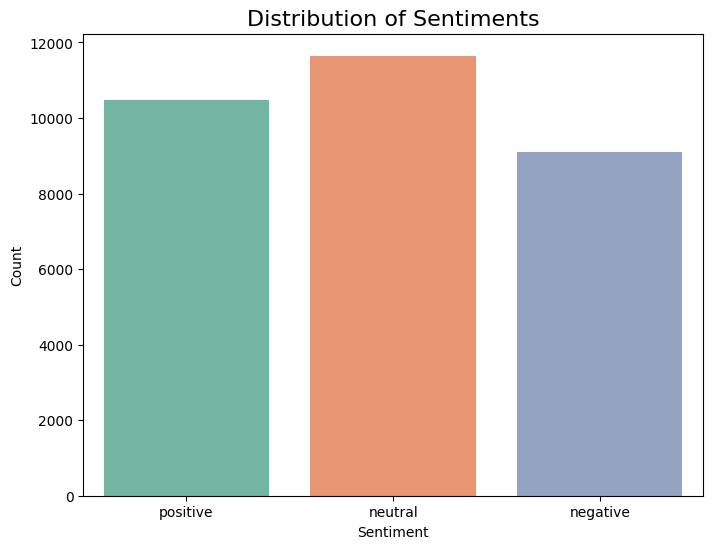

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Distribution of Sentiments", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

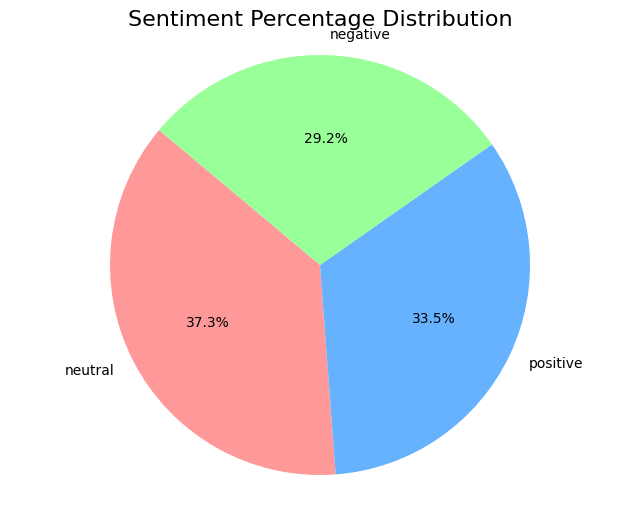

In [15]:
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100
plt.figure(figsize=(8,6))
colors = ['#FF9999','#66B2FF','#99FF99']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Sentiment Percentage Distribution", fontsize=16)
plt.axis('equal')
plt.show()

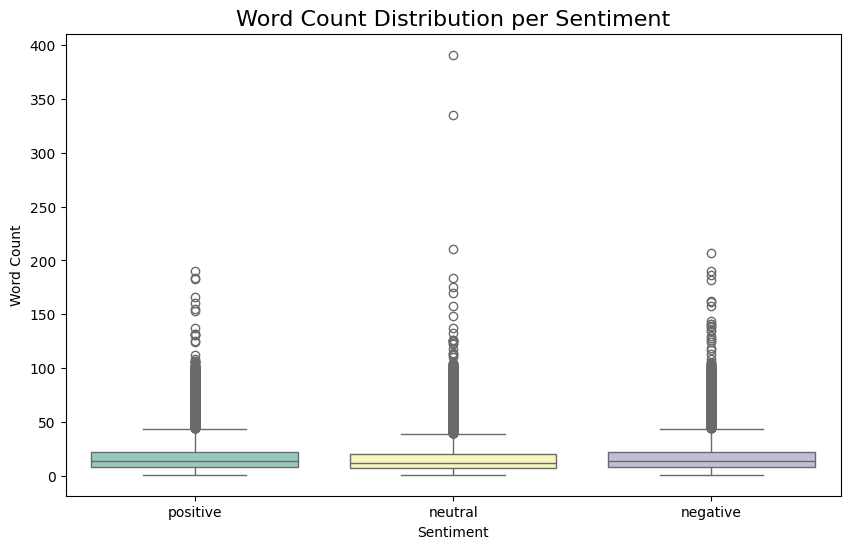

In [16]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,6))
sns.boxplot(x='sentiment', y='word_count', data=df, palette='Set3')
plt.title("Word Count Distribution per Sentiment", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.show()

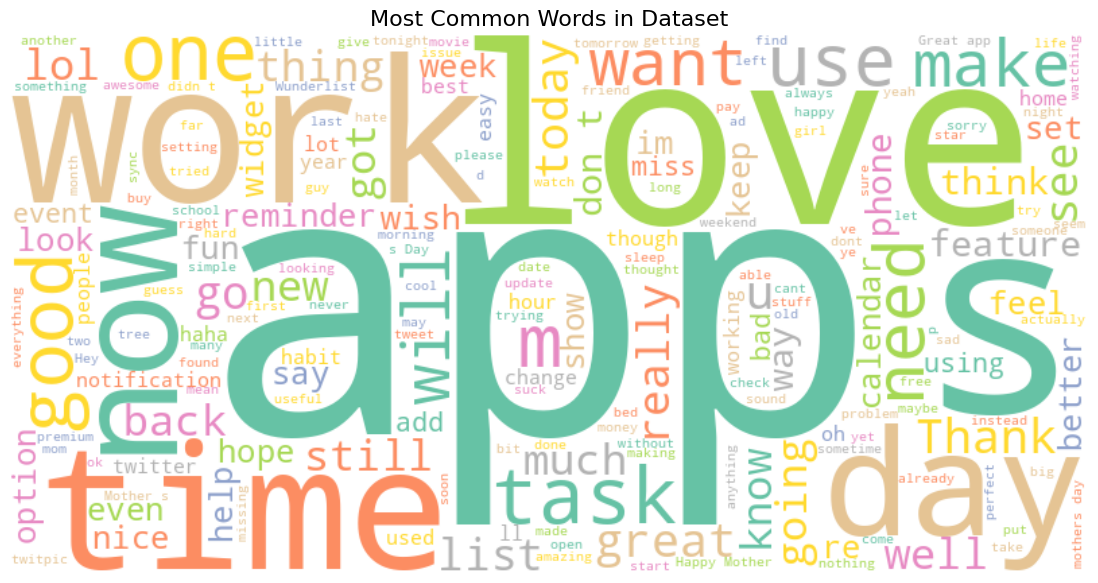

In [17]:
from collections import Counter
from wordcloud import WordCloud

all_words = ' '.join(df['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(all_words)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Dataset", fontsize=16)
plt.show()

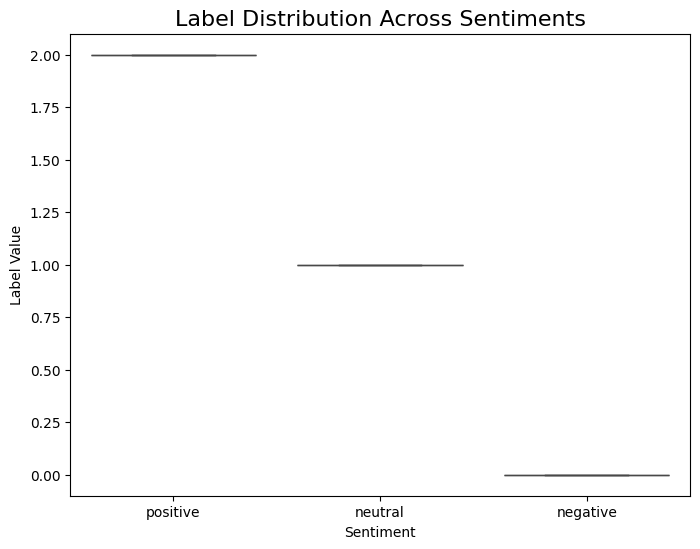

In [18]:
if df['label'].dtype != 'O':
    plt.figure(figsize=(8,6))
    sns.boxplot(x='sentiment', y='label', data=df, palette='Set1')
    plt.title("Label Distribution Across Sentiments", fontsize=16)
    plt.xlabel("Sentiment")
    plt.ylabel("Label Value")
    plt.show()

## Feature engg

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])


tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()

In [21]:
y = df['sentiment_encoded']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42),
    "Linear SVM": LinearSVC(random_state=42),   # ⚡ MUCH faster than SVC
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

In [24]:
results = []

for name, model in models.items():
    print(f"Training {name}...")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    rmse = mean_squared_error(y_test, y_pred) ** 0.5

    results.append([name, round(rmse, 4), round(accuracy, 2)])


Training Logistic Regression...
Training Random Forest...
Training Linear SVM...
Training Decision Tree...
Training Naive Bayes...


In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
results.append([name, round(rmse, 4), round(accuracy, 2)])

In [26]:
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "Accuracy (%)"])
print("\nModel Performance:")
print(results_df.sort_values(by="Accuracy (%)", ascending=False))


Model Performance:
                 Model    RMSE  Accuracy (%)
0  Logistic Regression  0.6758         66.34
1        Random Forest  0.7063         66.26
2           Linear SVM  0.7096         64.24
3        Decision Tree  0.7735         60.57
4          Naive Bayes  0.9733         47.05
5          Naive Bayes  0.9733         47.05


## Thank you..pls upvote!!!!